# Copyright Netherlands eScience Center <br>
** Function     : Analyze AMET from coordinated experiments** <br>
** Author       : Yang Liu ** <br>
** First Built  : 2019.08.09 ** <br>
** Last Update  : 2019.08.09 ** <br>
Description     : This notebook aims to analyze AMET taken as the residuals of TOA/surface flux fields from multiple coordinated experiments in Blue Action WP3. It contributes to the Deliverable 3.1. <br>
Return Values   : netCDF4 <br>
Caveat          : The fields used here are post-processed monthly mean fields. It includes AMET from:
* EC Earth (DMI)
* CMCC-CM (CMCC)
* WACCM6 (WHOI)
* NorESM (NERSC)
* HadGEM  (UoS)
* EC Earth (NLeSC)

In [1]:
%matplotlib inline
import numpy as np
import sys
#sys.path.append("/home/ESLT0068/NLeSC/Computation_Modeling/Bjerknes/Scripts/META")
import analyzer
import scipy as sp
import time as tttt
from netCDF4 import Dataset,num2date
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
# constants
constant = {'g' : 9.80616,      # gravititional acceleration [m / s2]
            'R' : 6371009,      # radius of the earth [m]
            'cp': 1004.64,      # heat capacity of air [J/(Kg*K)]
            'Lv': 2264670,      # Latent heat of vaporization [J/Kg]
            'R_dry' : 286.9,    # gas constant of dry air [J/(kg*K)]
            'R_vap' : 461.5,    # gas constant for water vapour [J/(kg*K)]
            }

|Model and Organization | Exp 1 | Exp 2 | Exp 3 | Exp 4 |    time   |
|-----------------------|-------|-------|-------|-------|-----------|
|    EC Earth (NLeSC)   |   10  |   10  |   1   |   1   | 1979-2015 |
|     EC Earth (DMI)    |   20  |   20  |   20  |   20  | 1979-2015 (exp1&2) 1979-2013 (exp3&4) |
|     CMCC-CM (CMCC)    |   10  |   10  |   0   |   0   | 1979-2014 |
|      WACCM6 (WHOI)    |   30  |   30  |   30  |   30  | 1979-2014 (exp1&2) 1979-2012 (exp3&4) |
|     NorESM (NERSC)    |   20  |   20  |   20  |   20  | 1979-2014 (exp1&2) 1979-2013 (exp3&4) |
|     HadGEM  (UoS)     |   10  |   10  |   5   |   5   | 1979-2014 (exp1&2) 1979-2013 (exp3&4) |
|   IAP-AGCM (IAP-NZC)  |   15  |   15  |   15  |   15  | 1979-2015 (exp1&2) 1979-2013 (exp3&4) |
|     IPSL-CM (CNRS)    |   30  |   30  |   20  |   20  | 1979-2014 |
|      MPIESM (MPI)     |   10  |   10  |   10  |   10  | 1979-2013 |

In [3]:
################################   Input zone  ######################################
# specify starting and ending time
# specify data path
datapath = '/home/ESLT0068/WorkFlow/Core_Database_BlueAction_WP3/AMET_netCDF'
# specify output path for figures
output_path = '/home/ESLT0068/NLeSC/Computation_Modeling/BlueAction/WP3/JointAnalysis_AMET/AMIP'
# how many models
models = 9
####################################################################################

In [4]:
################################   Extract variables  ######################################
# get path
# EC Earth (NLeSC)
datapath_NLeSC_exp1 = os.path.join(datapath, 'amet_ECEarth_NLeSC_exp1.nc')
datapath_NLeSC_exp2 = os.path.join(datapath, 'amet_ECEarth_NLeSC_exp2.nc')
datapath_NLeSC_exp3 = os.path.join(datapath, 'amet_ECEarth_NLeSC_exp3.nc')
datapath_NLeSC_exp4 = os.path.join(datapath, 'amet_ECEarth_NLeSC_exp4.nc')
# EC Earth (DMI)
datapath_DMI_exp1 = os.path.join(datapath, 'amet_ECEarth_DMI_exp1.nc')
datapath_DMI_exp2 = os.path.join(datapath, 'amet_ECEarth_DMI_exp2.nc')
datapath_DMI_exp3 = os.path.join(datapath, 'amet_ECEarth_DMI_exp3.nc')
datapath_DMI_exp4 = os.path.join(datapath, 'amet_ECEarth_DMI_exp4.nc')
# HadGEM (UoS)
datapath_UoS_exp1 = os.path.join(datapath, 'amet_HadGEM_UoS_exp1.nc')
datapath_UoS_exp2 = os.path.join(datapath, 'amet_HadGEM_UoS_exp2.nc')
datapath_UoS_exp3 = os.path.join(datapath, 'amet_HadGEM_UoS_exp3.nc')
datapath_UoS_exp4 = os.path.join(datapath, 'amet_HadGEM_UoS_exp4.nc')
# NorESM (NERSC)
datapath_NERSC_exp1 = os.path.join(datapath, 'amet_NorESM_NERSC_exp1.nc')
datapath_NERSC_exp2 = os.path.join(datapath, 'amet_NorESM_NERSC_exp2.nc')
datapath_NERSC_exp3 = os.path.join(datapath, 'amet_NorESM_NERSC_exp3.nc')
datapath_NERSC_exp4 = os.path.join(datapath, 'amet_NorESM_NERSC_exp4.nc')
# WACCM6 (WHOI)
datapath_WHOI_exp1 = os.path.join(datapath, 'amet_WACCM6_WHOI_exp1.nc')
datapath_WHOI_exp2 = os.path.join(datapath, 'amet_WACCM6_WHOI_exp2.nc')
datapath_WHOI_exp3 = os.path.join(datapath, 'amet_WACCM6_WHOI_exp3.nc')
datapath_WHOI_exp4 = os.path.join(datapath, 'amet_WACCM6_WHOI_exp4.nc')
# CMCC-CM (CMCC)
datapath_CMCC_exp1 = os.path.join(datapath, 'amet_CMCC-CM_CMCC_exp1.nc')
datapath_CMCC_exp2 = os.path.join(datapath, 'amet_CMCC-CM_CMCC_exp2.nc')
# IPSL-CM (CNRS)
datapath_CNRS_exp1 = os.path.join(datapath, 'amet_IPSL-CM_CNRS_exp1.nc')
datapath_CNRS_exp2 = os.path.join(datapath, 'amet_IPSL-CM_CNRS_exp2.nc')
datapath_CNRS_exp3 = os.path.join(datapath, 'amet_IPSL-CM_CNRS_exp3.nc')
datapath_CNRS_exp4 = os.path.join(datapath, 'amet_IPSL-CM_CNRS_exp4.nc')
# IAP-AGCM (IAP-NZC)	
datapath_IAP_exp1 = os.path.join(datapath, 'amet_IAP-AGCM_IAP-NZC_exp1.nc')
datapath_IAP_exp2 = os.path.join(datapath, 'amet_IAP-AGCM_IAP-NZC_exp2.nc')
datapath_IAP_exp3 = os.path.join(datapath, 'amet_IAP-AGCM_IAP-NZC_exp3.nc')
datapath_IAP_exp4 = os.path.join(datapath, 'amet_IAP-AGCM_IAP-NZC_exp4.nc')
# MPIESM (MPI)
datapath_MPI_exp1 = os.path.join(datapath, 'amet_MPIESM_MPI_exp1.nc')
datapath_MPI_exp2 = os.path.join(datapath, 'amet_MPIESM_MPI_exp2.nc')
datapath_MPI_exp3 = os.path.join(datapath, 'amet_MPIESM_MPI_exp3.nc')
#datapath_IAP_exp4 = os.path.join(datapath, 'amet_MPIESM_MPI_exp4.nc')

# get variable key
# EC Earth (DMI)
key_NLeSC_exp1 = Dataset(datapath_NLeSC_exp1)
key_NLeSC_exp2 = Dataset(datapath_NLeSC_exp2)
key_NLeSC_exp3 = Dataset(datapath_NLeSC_exp3)
key_NLeSC_exp4 = Dataset(datapath_NLeSC_exp4)
# EC Earth (DMI)
key_DMI_exp1 = Dataset(datapath_DMI_exp1)
key_DMI_exp2 = Dataset(datapath_DMI_exp2)
key_DMI_exp3 = Dataset(datapath_DMI_exp3)
key_DMI_exp4 = Dataset(datapath_DMI_exp4)
# HadGEM (UoS)
key_UoS_exp1 = Dataset(datapath_UoS_exp1)
key_UoS_exp2 = Dataset(datapath_UoS_exp2)
key_UoS_exp3 = Dataset(datapath_UoS_exp3)
key_UoS_exp4 = Dataset(datapath_UoS_exp4)
# NorESM (NERSC)
key_NERSC_exp1 = Dataset(datapath_NERSC_exp1)
key_NERSC_exp2 = Dataset(datapath_NERSC_exp2)
key_NERSC_exp3 = Dataset(datapath_NERSC_exp3)
key_NERSC_exp4 = Dataset(datapath_NERSC_exp4)
# WACCM6 (WHOI)
key_WHOI_exp1 = Dataset(datapath_WHOI_exp1)
key_WHOI_exp2 = Dataset(datapath_WHOI_exp2)
key_WHOI_exp3 = Dataset(datapath_WHOI_exp3)
key_WHOI_exp4 = Dataset(datapath_WHOI_exp4)
# CMCC-CM (CMCC)
key_CMCC_exp1 = Dataset(datapath_CMCC_exp1)
key_CMCC_exp2 = Dataset(datapath_CMCC_exp2)
# IPSL-CM (CNRS)
key_CNRS_exp1 = Dataset(datapath_CNRS_exp1)
key_CNRS_exp2 = Dataset(datapath_CNRS_exp2)
key_CNRS_exp3 = Dataset(datapath_CNRS_exp3)
key_CNRS_exp4 = Dataset(datapath_CNRS_exp4)
# IAP-AGCM (IAP-NZC)
key_IAP_exp1 = Dataset(datapath_IAP_exp1)
key_IAP_exp2 = Dataset(datapath_IAP_exp2)
key_IAP_exp3 = Dataset(datapath_IAP_exp3)
key_IAP_exp4 = Dataset(datapath_IAP_exp4)
# MPIESM (MPI)
key_MPI_exp1 = Dataset(datapath_MPI_exp1)
key_MPI_exp2 = Dataset(datapath_MPI_exp2)
key_MPI_exp3 = Dataset(datapath_MPI_exp3)
#key_MPI_exp4 = Dataset(datapath_MPI_exp4)

# get amet
# dimension[ensemble, year, month, lat]
################################   AMET  ######################################
# EC Earth (NLeSC)
AMET_NLeSC_exp1 = key_NLeSC_exp1.variables['amet'][:]
AMET_NLeSC_exp2 = key_NLeSC_exp2.variables['amet'][:]
AMET_NLeSC_exp3 = key_NLeSC_exp3.variables['amet'][:]
AMET_NLeSC_exp4 = key_NLeSC_exp4.variables['amet'][:]
# EC Earth (DMI)
AMET_DMI_exp1 = key_DMI_exp1.variables['amet'][:]
AMET_DMI_exp2 = key_DMI_exp2.variables['amet'][:]
AMET_DMI_exp3 = key_DMI_exp3.variables['amet'][:]
AMET_DMI_exp4 = key_DMI_exp4.variables['amet'][:]
# HadGEM (UoS)
AMET_UoS_exp1 = key_UoS_exp1.variables['amet'][:]
AMET_UoS_exp2 = key_UoS_exp2.variables['amet'][:]
AMET_UoS_exp3 = key_UoS_exp3.variables['amet'][:]
AMET_UoS_exp4 = key_UoS_exp4.variables['amet'][:]
# NorESM (NERSC)
AMET_NERSC_exp1 = key_NERSC_exp1.variables['amet'][:]
AMET_NERSC_exp2 = key_NERSC_exp2.variables['amet'][:]
AMET_NERSC_exp3 = key_NERSC_exp3.variables['amet'][:]
AMET_NERSC_exp4 = key_NERSC_exp4.variables['amet'][:]
# WACCM6 (WHOI)
AMET_WHOI_exp1 = key_WHOI_exp1.variables['amet'][:]
AMET_WHOI_exp2 = key_WHOI_exp2.variables['amet'][:]
AMET_WHOI_exp3 = key_WHOI_exp3.variables['amet'][:]
AMET_WHOI_exp4 = key_WHOI_exp4.variables['amet'][:]
# CMCC-CM (CMCC)
AMET_CMCC_exp1 = key_CMCC_exp1.variables['amet'][:]
AMET_CMCC_exp2 = key_CMCC_exp2.variables['amet'][:]
# IPSL-CM (CNRS)
AMET_CNRS_exp1 = key_CNRS_exp1.variables['amet'][:]
AMET_CNRS_exp2 = key_CNRS_exp2.variables['amet'][:]
AMET_CNRS_exp3 = key_CNRS_exp3.variables['amet'][:]
AMET_CNRS_exp4 = key_CNRS_exp4.variables['amet'][:]
# IAP-AGCM (IAP-NZC)
AMET_IAP_exp1 = key_IAP_exp1.variables['amet'][:]
AMET_IAP_exp2 = key_IAP_exp2.variables['amet'][:]
AMET_IAP_exp3 = key_IAP_exp3.variables['amet'][:]
AMET_IAP_exp4 = key_IAP_exp4.variables['amet'][:]
# MPIESM (MPI)
AMET_MPI_exp1 = key_MPI_exp1.variables['amet'][:]
AMET_MPI_exp2 = key_MPI_exp2.variables['amet'][:]
AMET_MPI_exp3 = key_MPI_exp3.variables['amet'][:]
#AMET_MPI_exp4 = key_MPI_exp4.variables['amet'][:]
# EC Earth (NLeSC)
lat_NLeSC = key_NLeSC_exp1.variables['latitude'][:]
# EC Earth (DMI)
lat_DMI = key_DMI_exp1.variables['latitude'][:]
# HadGEM (UoS)
lat_UoS = key_UoS_exp1.variables['latitude'][:]
# NorESM (NERSC)
lat_NERSC = key_NERSC_exp1.variables['latitude'][:]
# WACCM6 (WHOI)
lat_WHOI = key_WHOI_exp1.variables['latitude'][:]
# CMCC-CM (CMCC)
lat_CMCC = key_CMCC_exp1.variables['latitude'][:]
# IPSL-CM (CNRS)
lat_CNRS = key_CNRS_exp1.variables['latitude'][:]
# IAP-AGCM (IAP-NZC)
lat_IAP = key_IAP_exp1.variables['latitude'][:]
# MPIESM (MPI)
lat_MPI = key_MPI_exp1.variables['latitude'][:]

***********  60N  ************
60.2341
59.999813
59.842934
59.842934
60.277782
59.842934
59.577465
60.23622
59.376297
***********  20N  ************
[89.73115  89.38287  89.03254  88.68175  88.33077  87.97971  87.62861
 87.27747  86.92632  86.57516  86.223976 85.872795 85.52161  85.17041
 84.819214 84.46801  84.116806 83.7656   83.4144   83.063194 82.71198
 82.36077  82.00956  81.65835  81.30714  80.955925 80.60471  80.2535
 79.90228  79.55107  79.19986  78.84864  78.49743  78.14621  77.795
 77.44378  77.09257  76.74135  76.39013  76.03892  75.6877   75.33648
 74.98527  74.63405  74.28283  73.93161  73.5804   73.22918  72.87796
 72.52674  72.17552  71.82431  71.47309  71.12187  70.77065  70.41943
 70.068214 69.717    69.36578  69.014565 68.663345 68.312126 67.96091
 67.60969  67.25847  66.90725  66.55604  66.20482  65.8536   65.50238
 65.15116  64.79994  64.44872  64.0975   63.746284 63.39507  63.04385
 62.69263  62.34141  61.990192 61.638973 61.287754 60.936535 60.585316
 60.2341   59

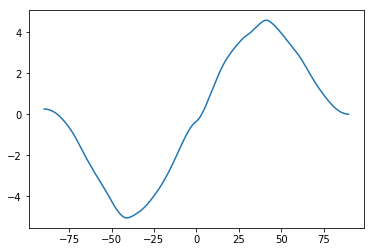

In [10]:
################################   Only for a first-check  ######################################
#print(AMET_CMCC_exp1.shape)
#plt.plot(lat_NLeSC[:], np.mean(AMET_NLeSC_exp1[0,0,:,:],0))
plt.plot(lat_NLeSC[:], np.mean(np.mean(AMET_NLeSC_exp3[0,:,:,:],0),0))
print("***********  60N  ************")
print(lat_NLeSC[84])
print(lat_DMI[42])
print(lat_WHOI[32])
print(lat_NERSC[32])
print(lat_UoS[53])
print(lat_CMCC[32])
print(lat_CNRS[24])
print(lat_IAP[21])
print(lat_MPI[32])
print("***********  20N  ************")
print(lat_NLeSC[:200])
#print(lat_DMI[:100])
#print(lat_WHOI[:75])
#print(lat_NERSC[:75])
#print(lat_UoS[:127])
#print(lat_CMCC[:75])
#print(lat_CNRS[:56])
#print(lat_IAP[:50])
#print(lat_MPI[:75])

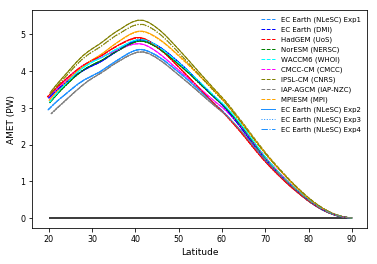

In [14]:
################################   Annual mean at different lat  ######################################
################################   only ensemble mean is used    ######################################
####################### color map #######################
####            EC Earth (NLeSC) : 'dodgerblue'      ####
####            EC Earth (DMI)   : 'blue'            ####
####            HadGEM (UoS)     : 'red'             ####
####            NorESM (NERSC)   : 'green'           ####
####            WACCM6 (WHOI)    : 'cyan'            ####
####            CMCC-CM (CMCC)   : 'magenta'         ####
####            IPSL-CM (CNRS)   : 'olive'           ####
####        IAP-AGCM (IAP-NZC)   : 'gray'            ####
####            MPIESM (MPI)     : 'orange'          ####
####################### color map #######################
####################### linestyles ######################
####          exp 1 (control)     : '--'             ####
####          exp 2 (sic fixed)   : '-'              ####
####          exp 3 (PDO removed) : ':'              ####
####          exp 4 (AMO removed) : '-.'             ####
####################### color map #######################
# EC Earth (DMI)
ens, yy, mm, _ = AMET_DMI_exp1.shape
fig = plt.figure()
plt.hlines(0,np.amin(lat_DMI[:100]), np.amax(lat_DMI[:100]),'k')
# Exp1
# EC Earth (NLeSC)
plt.plot(lat_NLeSC[:200], np.mean(np.mean(np.mean(AMET_NLeSC_exp1[:,:,:,:200],0),0),0),
         color='dodgerblue', linestyle='--', linewidth=1, label='EC Earth (NLeSC) Exp1')
# EC Earth (DMI)
plt.plot(lat_DMI[:100], np.mean(np.mean(np.mean(AMET_DMI_exp1[:,:,:,:100],0),0),0),
         color='blue', linestyle='--', linewidth=1, label='EC Earth (DMI)')
# HadGEM (UoS)
plt.plot(lat_UoS[:127], np.mean(np.mean(np.mean(AMET_UoS_exp1[:,:,:,:127],0),0),0),
         color='red', linestyle='--', linewidth=1, label='HadGEM (UoS)')
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], np.mean(np.mean(np.mean(AMET_NERSC_exp1[:,:,:,:75],0),0),0),
         color='green', linestyle='--', linewidth=1, label='NorESM (NERSC)')
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], np.mean(np.mean(np.mean(AMET_WHOI_exp1[:,:,:,:75],0),0),0),
         color='cyan', linestyle='--', linewidth=1, label='WACCM6 (WHOI)')
# CMCC-CM (CMCC)
plt.plot(lat_CMCC[:75], np.mean(np.mean(np.mean(AMET_CMCC_exp1[:,:,:,:75],0),0),0),
         color='magenta', linestyle='--', linewidth=1, label='CMCC-CM (CMCC)')
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], np.mean(np.mean(np.mean(AMET_CNRS_exp1[:,:,:,:56],0),0),0),
         color='olive', linestyle='--', linewidth=1, label='IPSL-CM (CNRS)')
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], np.mean(np.mean(np.mean(AMET_IAP_exp1[:,:,:,:50],0),0),0),
         color='gray', linestyle='--', linewidth=1, label='IAP-AGCM (IAP-NZC)')
# MPIESM (MPI)
plt.plot(lat_MPI[:75], np.mean(np.mean(np.mean(AMET_MPI_exp1[:,:,:,:75],0),0),0),
         color='orange', linestyle='--', linewidth=1, label='MPIESM (MPI)')
# Exp2
# EC Earth (NLeSC)
plt.plot(lat_NLeSC[:200], np.mean(np.mean(np.mean(AMET_NLeSC_exp2[:,:,:,:200],0),0),0),
         color='dodgerblue', linestyle='-', linewidth=1, label='EC Earth (NLeSC) Exp2')
# EC Earth (DMI)
plt.plot(lat_DMI[:100], np.mean(np.mean(np.mean(AMET_DMI_exp2[:,:,:,:100],0),0),0),
         color='blue', linestyle='-', linewidth=1)
# HadGEM (UoS)
plt.plot(lat_UoS[:127], np.mean(np.mean(np.mean(AMET_UoS_exp2[:,:,:,:127],0),0),0),
         color='red', linestyle='-', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], np.mean(np.mean(np.mean(AMET_NERSC_exp2[:,:,:,:75],0),0),0),
         color='green', linestyle='-', linewidth=1)
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], np.mean(np.mean(np.mean(AMET_WHOI_exp2[:,:,:,:75],0),0),0),
         color='cyan', linestyle='-', linewidth=1)
# CMCC-CM (CMCC)
plt.plot(lat_CMCC[:75], np.mean(np.mean(np.mean(AMET_CMCC_exp2[:,:,:,:75],0),0),0),
         color='magenta', linestyle='-', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], np.mean(np.mean(np.mean(AMET_CNRS_exp2[:,:,:,:56],0),0),0),
         color='olive', linestyle='-', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], np.mean(np.mean(np.mean(AMET_IAP_exp2[:,:,:,:50],0),0),0),
         color='gray', linestyle='-', linewidth=1)
# MPIESM (MPI)
plt.plot(lat_MPI[:75], np.mean(np.mean(np.mean(AMET_MPI_exp2[:,:,:,:75],0),0),0),
         color='orange', linestyle='-', linewidth=1)
# Exp3
# EC Earth (NLeSC)
plt.plot(lat_NLeSC[:200], np.mean(np.mean(AMET_NLeSC_exp3[0,:,:,:200],0),0),
         color='dodgerblue', linestyle=':', linewidth=1, label='EC Earth (NLeSC) Exp3')
# EC Earth (DMI)
plt.plot(lat_DMI[:100], np.mean(np.mean(np.mean(AMET_DMI_exp3[:,:,:,:100],0),0),0),
         color='blue', linestyle=':', linewidth=1)
# HadGEM (UoS)
plt.plot(lat_UoS[:127], np.mean(np.mean(np.mean(AMET_UoS_exp3[:,:,:,:127],0),0),0),
         color='red', linestyle=':', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], np.mean(np.mean(np.mean(AMET_NERSC_exp3[:,:,:,:75],0),0),0),
         color='green', linestyle=':', linewidth=1)
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], np.mean(np.mean(np.mean(AMET_WHOI_exp3[:,:,:,:75],0),0),0),
         color='cyan', linestyle=':', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], np.mean(np.mean(np.mean(AMET_CNRS_exp3[:,:,:,:56],0),0),0),
         color='olive', linestyle=':', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], np.mean(np.mean(np.mean(AMET_IAP_exp3[:,:,:,:50],0),0),0),
         color='gray', linestyle=':', linewidth=1)
# MPIESM (MPI)
plt.plot(lat_MPI[:75], np.mean(np.mean(np.mean(AMET_MPI_exp3[:,:,:,:75],0),0),0),
         color='orange', linestyle=':', linewidth=1)
# Exp4
# EC Earth (NLeSC)
plt.plot(lat_NLeSC[:200], np.mean(np.mean(AMET_NLeSC_exp4[0,:,:,:200],0),0),
         color='dodgerblue', linestyle='-.', linewidth=1, label='EC Earth (NLeSC) Exp4')
# EC Earth (DMI)
plt.plot(lat_DMI[:100], np.mean(np.mean(np.mean(AMET_DMI_exp4[:,:,:,:100],0),0),0),
         color='blue', linestyle='-.', linewidth=1)
# HadGEM (UoS)
plt.plot(lat_UoS[:127], np.mean(np.mean(np.mean(AMET_UoS_exp4[:,:,:,:127],0),0),0),
         color='red', linestyle='-.', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], np.mean(np.mean(np.mean(AMET_NERSC_exp4[:,:,:,:75],0),0),0),
         color='green', linestyle='-.', linewidth=1)
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], np.mean(np.mean(np.mean(AMET_WHOI_exp4[:,:,:,:75],0),0),0),
         color='cyan', linestyle='-.', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], np.mean(np.mean(np.mean(AMET_CNRS_exp4[:,:,:,:56],0),0),0),
         color='olive', linestyle='-.', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], np.mean(np.mean(np.mean(AMET_IAP_exp4[:,:,:,:50],0),0),0),
         color='gray', linestyle='-.', linewidth=1)

plt.xlabel("Latitude",fontsize=9)
plt.ylabel("AMET (PW)",fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(frameon=False, loc=1, prop={'size': 7})
plt.show()
fig.savefig(os.path.join(output_path,'Annual_mean_ensAvg_AMIP.png'),dpi=200)
plt.close(fig)

Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!


/home/ESLT0068/NLeSC/Computation_Modeling/BlueAction/WP3/Scripts/JointAnalysis/Analysis/analyzer.py:206: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a[i], b[i] = np.linalg.lstsq(A,series[:,i])[0]


Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input

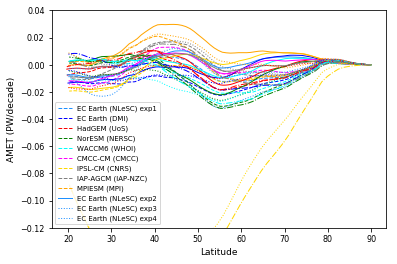

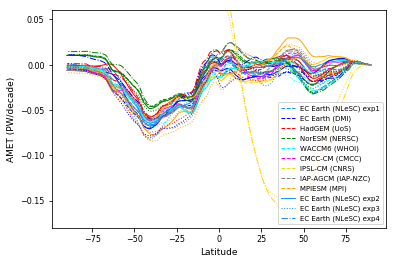

In [19]:
##############################   Anomalies trend at different lat     #################################
################################   only ensemble mean is used    ######################################
####################### color map #######################
####            EC Earth (NLeSC) : 'dodgerblue'      ####
####            EC Earth (DMI)   : 'blue'            ####
####            HadGEM (UoS)     : 'red'             ####
####            NorESM (NERSC)   : 'green'           ####
####            WACCM6 (WHOI)    : 'cyan'            ####
####            CMCC-CM (CMCC)   : 'magenta'         ####
####            IPSL-CM (CNRS)   : 'olive'           ####
####        IAP-AGCM (IAP-NZC)   : 'gray'            ####
####            MPIESM (MPI)     : 'orange'          ####
####################### color map #######################
####################### linestyles ######################
####          exp 1 (control)     : '--'             ####
####          exp 2 (sic fixed)   : '-'              ####
####          exp 3 (PDO removed) : ':'              ####
####          exp 4 (AMO removed) : '-.'             ####
####################### color map #######################
# EC Earth (NLeSC)
ens_avg_NLeSC_exp1 = analyzer.statistics(np.mean(AMET_NLeSC_exp1[:,:,:,:],0))
ens_avg_NLeSC_exp1.anomaly(Dim_ens=False)
ens_avg_NLeSC_exp1.trend(Dim_ens=False)
ens_avg_NLeSC_exp2 = analyzer.statistics(np.mean(AMET_NLeSC_exp2[:,:,:,:],0))
ens_avg_NLeSC_exp2.anomaly(Dim_ens=False)
ens_avg_NLeSC_exp2.trend(Dim_ens=False)
ens_avg_NLeSC_exp3 = analyzer.statistics(AMET_NLeSC_exp3[0,:,:,:]) # only 1 member
ens_avg_NLeSC_exp3.anomaly(Dim_ens=False)
ens_avg_NLeSC_exp3.trend(Dim_ens=False)
ens_avg_NLeSC_exp4 = analyzer.statistics(AMET_NLeSC_exp4[0,:,:,:])
ens_avg_NLeSC_exp4.anomaly(Dim_ens=False)
ens_avg_NLeSC_exp4.trend(Dim_ens=False)

# EC Earth (DMI)
#ens_DMI_exp1 = analyzer.statistics(AMET_DMI_exp1[:,:,:,:])
#ens_DMI_exp1.anomaly()
#ens_DMI_exp1.lowpass()
ens_avg_DMI_exp1 = analyzer.statistics(np.mean(AMET_DMI_exp1[:,:,:,:],0))
ens_avg_DMI_exp1.anomaly(Dim_ens=False)
ens_avg_DMI_exp1.trend(Dim_ens=False)
ens_avg_DMI_exp2 = analyzer.statistics(np.mean(AMET_DMI_exp2[:,:,:,:],0))
ens_avg_DMI_exp2.anomaly(Dim_ens=False)
ens_avg_DMI_exp2.trend(Dim_ens=False)
ens_avg_DMI_exp3 = analyzer.statistics(np.mean(AMET_DMI_exp3[:,:,:,:],0))
ens_avg_DMI_exp3.anomaly(Dim_ens=False)
ens_avg_DMI_exp3.trend(Dim_ens=False)
ens_avg_DMI_exp4 = analyzer.statistics(np.mean(AMET_DMI_exp4[:,:,:,:],0))
ens_avg_DMI_exp4.anomaly(Dim_ens=False)
ens_avg_DMI_exp4.trend(Dim_ens=False)

# HadGEM (UoS)
#ens_DMI_exp1 = analyzer.statistics(AMET_DMI_exp1[:,:,:,:])
#ens_DMI_exp1.anomaly()
#ens_DMI_exp1.lowpass()
ens_avg_UoS_exp1 = analyzer.statistics(np.mean(AMET_UoS_exp1[:,:,:,:],0))
ens_avg_UoS_exp1.anomaly(Dim_ens=False)
ens_avg_UoS_exp1.trend(Dim_ens=False)
ens_avg_UoS_exp2 = analyzer.statistics(np.mean(AMET_UoS_exp2[:,:,:,:],0))
ens_avg_UoS_exp2.anomaly(Dim_ens=False)
ens_avg_UoS_exp2.trend(Dim_ens=False)
ens_avg_UoS_exp3 = analyzer.statistics(np.mean(AMET_UoS_exp3[:,:,:,:],0))
ens_avg_UoS_exp3.anomaly(Dim_ens=False)
ens_avg_UoS_exp3.trend(Dim_ens=False)
ens_avg_UoS_exp4 = analyzer.statistics(np.mean(AMET_UoS_exp4[:,:,:,:],0))
ens_avg_UoS_exp4.anomaly(Dim_ens=False)
ens_avg_UoS_exp4.trend(Dim_ens=False)

# NorESM (NERSC)
#ens_NERSC_exp1 = analyzer.statistics(AMET_NERSC_exp1[:,:,:,:])
#ens_NERSC_exp1.anomaly()
#ens_NERSC_exp1.lowpass()
ens_avg_NERSC_exp1 = analyzer.statistics(np.mean(AMET_NERSC_exp1[:,:,:,:],0))
ens_avg_NERSC_exp1.anomaly(Dim_ens=False)
ens_avg_NERSC_exp1.trend(Dim_ens=False)
ens_avg_NERSC_exp2 = analyzer.statistics(np.mean(AMET_NERSC_exp2[:,:,:,:],0))
ens_avg_NERSC_exp2.anomaly(Dim_ens=False)
ens_avg_NERSC_exp2.trend(Dim_ens=False)
ens_avg_NERSC_exp3 = analyzer.statistics(np.mean(AMET_NERSC_exp3[:,:,:,:],0))
ens_avg_NERSC_exp3.anomaly(Dim_ens=False)
ens_avg_NERSC_exp3.trend(Dim_ens=False)
ens_avg_NERSC_exp4 = analyzer.statistics(np.mean(AMET_NERSC_exp4[:,:,:,:],0))
ens_avg_NERSC_exp4.anomaly(Dim_ens=False)
ens_avg_NERSC_exp4.trend(Dim_ens=False)

# WACCM6 (WHOI)
ens_avg_WHOI_exp1 = analyzer.statistics(np.mean(AMET_WHOI_exp1[:,:,:,:],0))
ens_avg_WHOI_exp1.anomaly(Dim_ens=False)
ens_avg_WHOI_exp1.trend(Dim_ens=False)
ens_avg_WHOI_exp2 = analyzer.statistics(np.mean(AMET_WHOI_exp2[:,:,:,:],0))
ens_avg_WHOI_exp2.anomaly(Dim_ens=False)
ens_avg_WHOI_exp2.trend(Dim_ens=False)
ens_avg_WHOI_exp3 = analyzer.statistics(np.mean(AMET_WHOI_exp3[:,:,:,:],0))
ens_avg_WHOI_exp3.anomaly(Dim_ens=False)
ens_avg_WHOI_exp3.trend(Dim_ens=False)
ens_avg_WHOI_exp4 = analyzer.statistics(np.mean(AMET_WHOI_exp4[:,:,:,:],0))
ens_avg_WHOI_exp4.anomaly(Dim_ens=False)
ens_avg_WHOI_exp4.trend(Dim_ens=False)

# CMCC-CM (CMCC)
ens_avg_CMCC_exp1 = analyzer.statistics(np.mean(AMET_CMCC_exp1[:,:,:,:],0))
ens_avg_CMCC_exp1.anomaly(Dim_ens=False)
ens_avg_CMCC_exp1.trend(Dim_ens=False)
ens_avg_CMCC_exp2 = analyzer.statistics(np.mean(AMET_CMCC_exp2[:,:,:,:],0))
ens_avg_CMCC_exp2.anomaly(Dim_ens=False)
ens_avg_CMCC_exp2.trend(Dim_ens=False)

# IPSL-CM (CNRS)
ens_avg_CNRS_exp1 = analyzer.statistics(np.mean(AMET_CNRS_exp1[:,:,:,:],0))
ens_avg_CNRS_exp1.anomaly(Dim_ens=False)
ens_avg_CNRS_exp1.trend(Dim_ens=False)
ens_avg_CNRS_exp2 = analyzer.statistics(np.mean(AMET_CNRS_exp2[:,:,:,:],0))
ens_avg_CNRS_exp2.anomaly(Dim_ens=False)
ens_avg_CNRS_exp2.trend(Dim_ens=False)
ens_avg_CNRS_exp3 = analyzer.statistics(np.mean(AMET_CNRS_exp3[:,:,:,:],0))
ens_avg_CNRS_exp3.anomaly(Dim_ens=False)
ens_avg_CNRS_exp3.trend(Dim_ens=False)
ens_avg_CNRS_exp4 = analyzer.statistics(np.mean(AMET_CNRS_exp4[:,:,:,:],0))
ens_avg_CNRS_exp4.anomaly(Dim_ens=False)
ens_avg_CNRS_exp4.trend(Dim_ens=False)

# IAP-AGCM (IAP-NZC)
ens_avg_IAP_exp1 = analyzer.statistics(np.mean(AMET_IAP_exp1[:,:,:,:],0))
ens_avg_IAP_exp1.anomaly(Dim_ens=False)
ens_avg_IAP_exp1.trend(Dim_ens=False)
ens_avg_IAP_exp2 = analyzer.statistics(np.mean(AMET_IAP_exp2[:,:,:,:],0))
ens_avg_IAP_exp2.anomaly(Dim_ens=False)
ens_avg_IAP_exp2.trend(Dim_ens=False)
ens_avg_IAP_exp3 = analyzer.statistics(np.mean(AMET_IAP_exp3[:,:,:,:],0))
ens_avg_IAP_exp3.anomaly(Dim_ens=False)
ens_avg_IAP_exp3.trend(Dim_ens=False)
ens_avg_IAP_exp4 = analyzer.statistics(np.mean(AMET_IAP_exp4[:,:,:,:],0))
ens_avg_IAP_exp4.anomaly(Dim_ens=False)
ens_avg_IAP_exp4.trend(Dim_ens=False)

# MPIESM (MPI)
ens_avg_MPI_exp1 = analyzer.statistics(np.mean(AMET_MPI_exp1[:,:,:,:],0))
ens_avg_MPI_exp1.anomaly(Dim_ens=False)
ens_avg_MPI_exp1.trend(Dim_ens=False)
ens_avg_MPI_exp2 = analyzer.statistics(np.mean(AMET_MPI_exp2[:,:,:,:],0))
ens_avg_MPI_exp2.anomaly(Dim_ens=False)
ens_avg_MPI_exp2.trend(Dim_ens=False)
ens_avg_MPI_exp3 = analyzer.statistics(np.mean(AMET_MPI_exp3[:,:,:,:],0))
ens_avg_MPI_exp3.anomaly(Dim_ens=False)
ens_avg_MPI_exp3.trend(Dim_ens=False)
# ens_avg_MPI_exp4 = analyzer.statistics(np.mean(AMET_MPI_exp4[:,:,:,:],0))
# ens_avg_MPI_exp4.anomaly(Dim_ens=False)
# ens_avg_MPI_exp4.trend(Dim_ens=False)

fig = plt.figure()
# Exp1
#EC Earth (NLeSC)
plt.plot(lat_NLeSC[:200], ens_avg_NLeSC_exp1._a[:200]*120, color='dodgerblue', linestyle='--', linewidth=1, label='EC Earth (NLeSC) exp1')
#EC Earth (DMI)
plt.plot(lat_DMI[:100], ens_avg_DMI_exp1._a[:100]*120, color='blue', linestyle='--', linewidth=1, label='EC Earth (DMI)')
# HadGEM (UoS)
plt.plot(lat_UoS[:127], ens_avg_UoS_exp1._a[:127]*120, color='red', linestyle='--', linewidth=1, label='HadGEM (UoS)')
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], ens_avg_NERSC_exp1._a[:75]*120, color='green', linestyle='--', linewidth=1, label='NorESM (NERSC)')
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], ens_avg_WHOI_exp1._a[:75]*120, color='cyan', linestyle='--', linewidth=1, label='WACCM6 (WHOI)')
# CMCC-CM (CMCC)
plt.plot(lat_CMCC[:75], ens_avg_CMCC_exp1._a[:75]*120, color='magenta', linestyle='--', linewidth=1, label='CMCC-CM (CMCC)')
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], ens_avg_CNRS_exp1._a[:56]*120, color='gold', linestyle='--', linewidth=1, label='IPSL-CM (CNRS)')
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], ens_avg_IAP_exp1._a[:50]*120, color='gray', linestyle='--', linewidth=1, label='IAP-AGCM (IAP-NZC)')
# MPIESM (MPI)
plt.plot(lat_MPI[:75], ens_avg_MPI_exp1._a[:75]*120, color='orange', linestyle='--', linewidth=1, label='MPIESM (MPI)')

# Exp2
#EC Earth (NLeSC)
plt.plot(lat_NLeSC[:200], ens_avg_NLeSC_exp2._a[:200]*120, color='dodgerblue', linestyle='-',
         linewidth=1, label='EC Earth (NLeSC) exp2')
#EC Earth (DMI)
plt.plot(lat_DMI[:100], ens_avg_DMI_exp2._a[:100]*120, color='blue', linestyle='-', linewidth=1)
# HadGEM (UoS)
plt.plot(lat_UoS[:127], ens_avg_UoS_exp2._a[:127]*120, color='red', linestyle='-', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], ens_avg_NERSC_exp2._a[:75]*120, color='green', linestyle='-', linewidth=1)
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], ens_avg_WHOI_exp2._a[:75]*120, color='cyan', linestyle='-', linewidth=1)
# CMCC-CM (CMCC)
plt.plot(lat_CMCC[:75], ens_avg_CMCC_exp2._a[:75]*120, color='magenta', linestyle='-', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], ens_avg_CNRS_exp2._a[:56]*120, color='gold', linestyle='-', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], ens_avg_IAP_exp2._a[:50]*120, color='gray', linestyle='-', linewidth=1)
# MPIESM (MPI)
plt.plot(lat_MPI[:75], ens_avg_MPI_exp2._a[:75]*120, color='orange', linestyle='-', linewidth=1)

# Exp3
#EC Earth (NLeSC)
plt.plot(lat_NLeSC[:200], ens_avg_NLeSC_exp3._a[:200]*120, color='dodgerblue', linestyle=':',
         linewidth=1, label='EC Earth (NLeSC) exp3')
#EC Earth (DMI)
plt.plot(lat_DMI[:100], ens_avg_DMI_exp3._a[:100]*120, color='blue', linestyle=':', linewidth=1)
# HadGEM (UoS)
plt.plot(lat_UoS[:127], ens_avg_UoS_exp3._a[:127]*120, color='red', linestyle=':', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], ens_avg_NERSC_exp3._a[:75]*120, color='green', linestyle=':', linewidth=1)
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], ens_avg_WHOI_exp3._a[:75]*120, color='cyan', linestyle=':', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], ens_avg_CNRS_exp3._a[:56]*120, color='gold', linestyle=':', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], ens_avg_IAP_exp3._a[:50]*120, color='gray', linestyle=':', linewidth=1)
# MPIESM (MPI)
plt.plot(lat_MPI[:75], ens_avg_MPI_exp3._a[:75]*120, color='orange', linestyle=':', linewidth=1)

# Exp4
#EC Earth (NLeSC)
plt.plot(lat_NLeSC[:200], ens_avg_NLeSC_exp4._a[:200]*120, color='dodgerblue', linestyle=':',
         linewidth=1, label='EC Earth (NLeSC) exp4')
#EC Earth (DMI)
plt.plot(lat_DMI[:100], ens_avg_DMI_exp4._a[:100]*120, color='blue', linestyle='-.', linewidth=1)
# HadGEM (UoS)
plt.plot(lat_UoS[:127], ens_avg_UoS_exp4._a[:127]*120, color='red', linestyle='-.', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:75], ens_avg_NERSC_exp4._a[:75]*120, color='green', linestyle='-.', linewidth=1)
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:75], ens_avg_WHOI_exp4._a[:75]*120, color='cyan', linestyle='-.', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:56], ens_avg_CNRS_exp4._a[:56]*120, color='gold', linestyle='-.', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:50], ens_avg_IAP_exp4._a[:50]*120, color='gray', linestyle='-.', linewidth=1)
# # MPIESM (MPI)
# plt.plot(lat_MPI[:75], ens_avg_MPI_exp4._a[:75]*120, color='orange', linestyle='-.', linewidth=1)

plt.xlabel("Latitude",fontsize=9)
plt.ylabel("AMET (PW/decade)",fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(-0.12,0.04)
plt.legend(frameon=True, loc=3, prop={'size': 7})
plt.show()
fig.savefig(os.path.join(output_path,'Anomaly_trend_upto20N_ensAvg_AMIP.png'),dpi=200)
plt.close(fig)

fig2 = plt.figure()
# Exp1
#EC Earth (NLeSC)
plt.plot(lat_NLeSC[:], ens_avg_NLeSC_exp1._a[:]*120, color='dodgerblue', linestyle='--', linewidth=1, label='EC Earth (NLeSC) exp1')
#EC Earth (DMI)
plt.plot(lat_DMI[:], ens_avg_DMI_exp1._a[:]*120, color='blue', linestyle='--', linewidth=1, label='EC Earth (DMI)')
# HadGEM (UoS)
plt.plot(lat_UoS[:], ens_avg_UoS_exp1._a[:]*120, color='red', linestyle='--', linewidth=1, label='HadGEM (UoS)')
# NorESM (NERSC)
plt.plot(lat_NERSC[:], ens_avg_NERSC_exp1._a[:]*120, color='green', linestyle='--', linewidth=1, label='NorESM (NERSC)')
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:], ens_avg_WHOI_exp1._a[:]*120, color='cyan', linestyle='--', linewidth=1, label='WACCM6 (WHOI)')
# CMCC-CM (CMCC)
plt.plot(lat_CMCC[:], ens_avg_CMCC_exp1._a[:]*120, color='magenta', linestyle='--', linewidth=1, label='CMCC-CM (CMCC)')
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:], ens_avg_CNRS_exp1._a[:]*120, color='gold', linestyle='--', linewidth=1, label='IPSL-CM (CNRS)')
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:], ens_avg_IAP_exp1._a[:]*120, color='gray', linestyle='--', linewidth=1, label='IAP-AGCM (IAP-NZC)')
# MPIESM (MPI)
plt.plot(lat_MPI[:], ens_avg_MPI_exp1._a[:]*120, color='orange', linestyle='--', linewidth=1, label='MPIESM (MPI)')

# Exp2
#EC Earth (NLeSC)
plt.plot(lat_NLeSC[:], ens_avg_NLeSC_exp2._a[:]*120, color='dodgerblue', linestyle='-', linewidth=1, label='EC Earth (NLeSC) exp2')
#EC Earth (DMI)
plt.plot(lat_DMI[:], ens_avg_DMI_exp2._a[:]*120, color='blue', linestyle='-', linewidth=1)
# HadGEM (UoS)
plt.plot(lat_UoS[:], ens_avg_UoS_exp2._a[:]*120, color='red', linestyle='-', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:], ens_avg_NERSC_exp2._a[:]*120, color='green', linestyle='-', linewidth=1)
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:], ens_avg_WHOI_exp2._a[:]*120, color='cyan', linestyle='-', linewidth=1)
# CMCC-CM (CMCC)
plt.plot(lat_CMCC[:], ens_avg_CMCC_exp2._a[:]*120, color='magenta', linestyle='-', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:], ens_avg_CNRS_exp2._a[:]*120, color='gold', linestyle='-', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:], ens_avg_IAP_exp2._a[:]*120, color='gray', linestyle='-', linewidth=1)
# MPIESM (MPI)
plt.plot(lat_MPI[:], ens_avg_MPI_exp2._a[:]*120, color='orange', linestyle='-', linewidth=1)

# Exp3
#EC Earth (NLeSC)
plt.plot(lat_NLeSC[:], ens_avg_NLeSC_exp3._a[:]*120, color='dodgerblue', linestyle=':', linewidth=1, label='EC Earth (NLeSC) exp3')
#EC Earth (DMI)
plt.plot(lat_DMI[:], ens_avg_DMI_exp3._a[:]*120, color='blue', linestyle=':', linewidth=1)
# HadGEM (UoS)
plt.plot(lat_UoS[:], ens_avg_UoS_exp3._a[:]*120, color='red', linestyle=':', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:], ens_avg_NERSC_exp3._a[:]*120, color='green', linestyle=':', linewidth=1)
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:], ens_avg_WHOI_exp3._a[:]*120, color='cyan', linestyle=':', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:], ens_avg_CNRS_exp3._a[:]*120, color='gold', linestyle=':', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:], ens_avg_IAP_exp3._a[:]*120, color='gray', linestyle=':', linewidth=1)
# MPIESM (MPI)
plt.plot(lat_MPI[:], ens_avg_MPI_exp3._a[:]*120, color='orange', linestyle=':', linewidth=1)

# Exp4
#EC Earth (NLeSC)
plt.plot(lat_NLeSC[:], ens_avg_NLeSC_exp4._a[:]*120, color='dodgerblue', linestyle='-.',
         linewidth=1, label='EC Earth (NLeSC) exp4')
#EC Earth (DMI)
plt.plot(lat_DMI[:], ens_avg_DMI_exp4._a[:]*120, color='blue', linestyle='-.', linewidth=1)
# HadGEM (UoS)
plt.plot(lat_UoS[:], ens_avg_UoS_exp4._a[:]*120, color='red', linestyle='-.', linewidth=1)
# NorESM (NERSC)
plt.plot(lat_NERSC[:], ens_avg_NERSC_exp4._a[:]*120, color='green', linestyle='-.', linewidth=1)
# WACCM6 (WHOI)
plt.plot(lat_WHOI[:], ens_avg_WHOI_exp4._a[:]*120, color='cyan', linestyle='-.', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(lat_CNRS[:], ens_avg_CNRS_exp4._a[:]*120, color='gold', linestyle='-.', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(lat_IAP[:], ens_avg_IAP_exp4._a[:]*120, color='gray', linestyle='-.', linewidth=1)

plt.xlabel("Latitude",fontsize=9)
plt.ylabel("AMET (PW/decade)",fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(-0.18,0.06)
plt.legend(frameon=True, loc=4, prop={'size': 7})
plt.show()
fig2.savefig(os.path.join(output_path,'Anomaly_trend_global_ensAvg_AMIP.png'),dpi=200)
plt.close(fig2)

|Model and Organization | Exp 1 | Exp 2 | Exp 3 | Exp 4 |    time   |
|-----------------------|-------|-------|-------|-------|-----------|
|    EC Earth (NLeSC)   |   10  |   9   |   1   |   1   | 1979-2015 (exp1&2) 1979-2013 (exp3&4) |
|     EC Earth (DMI)    |   20  |   20  |   20  |   20  | 1979-2015 (exp1&2) 1979-2013 (exp3&4) |
|     CMCC-CM (CMCC)    |   10  |   10  |   0   |   0   | 1979-2014 |
|      WACCM6 (WHOI)    |   30  |   30  |   30  |   30  | 1979-2014 (exp1&2) 1979-2012 (exp3&4) |
|     NorESM (NERSC)    |   20  |   20  |   20  |   20  | 1979-2014 (exp1&2) 1979-2013 (exp3&4) |
|     HadGEM  (UoS)     |   10  |   10  |   5   |   5   | 1979-2014 (exp1&2) 1979-2013 (exp3&4) |
|   IAP-AGCM (IAP-NZC)  |   15  |   15  |   15  |   15  | 1979-2015 (exp1&2) 1979-2013 (exp3&4) |
|     IPSL-CM (CNRS)    |   30  |   30  |   20  |   20  | 1979-2014 |
|      MPIESM (MPI)     |   10  |   10  |   5   |   5   | 1979-2013 |

Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input

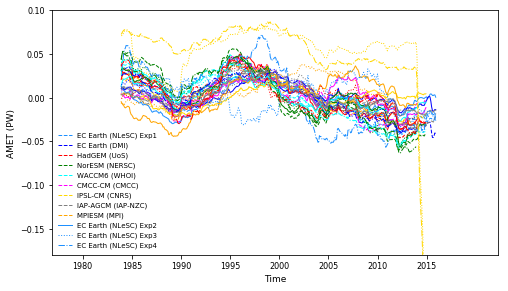

In [32]:
################################   Anomalies at certain sections  ######################################
################################   only ensemble mean is used     ######################################
####################### color map #######################
####            EC Earth (NLeSC) : 'dodgerblue'      ####
####            EC Earth (DMI)   : 'blue'            ####
####            HadGEM (UoS)     : 'red'             ####
####            NorESM (NERSC)   : 'green'           ####
####            WACCM6 (WHOI)    : 'cyan'            ####
####            CMCC-CM (CMCC)   : 'magenta'         ####
####            IPSL-CM (CNRS)   : 'olive'           ####
####        IAP-AGCM (IAP-NZC)   : 'gray'            ####
####            MPIESM (MPI)     : 'orange'          ####
####################### color map #######################
####################### linestyles ######################
####          exp 1 (control)     : '--'             ####
####          exp 2 (sic fixed)   : '-'              ####
####          exp 3 (PDO removed) : ':'              ####
####          exp 4 (AMO removed) : '-.'             ####
####################### color map #######################
# lat 60N
lat_NLeSC_60N = 84
lat_DMI_60N = 42
lat_WHOI_60N = 32
lat_NERSC_60N = 32
lat_UoS_60N = 57
lat_CMCC_60N = 32
lat_CNRS_60N = 24
lat_IAP_60N = 21
lat_MPI_60N = 32
# lowpass filter window
window=60 # month
# index
index_1979_2012 = np.arange(1,34*12+1,1)
index_1979_2013 = np.arange(1,35*12+1,1)
index_1979_2014 = np.arange(1,36*12+1,1)
index_1979_2015 = np.arange(1,37*12+1,1)
index_year = np.arange(1980,2020,5)

# EC Earth (NLeSC)
ens_avg_NLeSC_exp1 = analyzer.statistics(np.mean(AMET_NLeSC_exp1[:,:,:,lat_NLeSC_60N],0))
ens_avg_NLeSC_exp1.anomaly(Dim_ens=False)
ens_avg_NLeSC_exp1.lowpass(Dim_ens=False)
ens_avg_NLeSC_exp2 = analyzer.statistics(np.mean(AMET_NLeSC_exp2[:,:,:,lat_NLeSC_60N],0))
ens_avg_NLeSC_exp2.anomaly(Dim_ens=False)
ens_avg_NLeSC_exp2.lowpass(Dim_ens=False)
ens_avg_NLeSC_exp3 = analyzer.statistics(AMET_NLeSC_exp3[0,:,:,lat_NLeSC_60N])
ens_avg_NLeSC_exp3.anomaly(Dim_ens=False)
ens_avg_NLeSC_exp3.lowpass(Dim_ens=False)
ens_avg_NLeSC_exp4 = analyzer.statistics(AMET_NLeSC_exp4[0,:,:,lat_NLeSC_60N])
ens_avg_NLeSC_exp4.anomaly(Dim_ens=False)
ens_avg_NLeSC_exp4.lowpass(Dim_ens=False)

# EC Earth (DMI)
ens_avg_DMI_exp1 = analyzer.statistics(np.mean(AMET_DMI_exp1[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp1.anomaly(Dim_ens=False)
ens_avg_DMI_exp1.lowpass(Dim_ens=False)
ens_avg_DMI_exp2 = analyzer.statistics(np.mean(AMET_DMI_exp2[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp2.anomaly(Dim_ens=False)
ens_avg_DMI_exp2.lowpass(Dim_ens=False)
ens_avg_DMI_exp3 = analyzer.statistics(np.mean(AMET_DMI_exp3[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp3.anomaly(Dim_ens=False)
ens_avg_DMI_exp3.lowpass(Dim_ens=False)
ens_avg_DMI_exp4 = analyzer.statistics(np.mean(AMET_DMI_exp4[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp4.anomaly(Dim_ens=False)
ens_avg_DMI_exp4.lowpass(Dim_ens=False)

# HadGEM (UoS)
ens_avg_UoS_exp1 = analyzer.statistics(np.mean(AMET_UoS_exp1[:,:,:,lat_UoS_60N],0))
ens_avg_UoS_exp1.anomaly(Dim_ens=False)
ens_avg_UoS_exp1.lowpass(Dim_ens=False)
ens_avg_UoS_exp2 = analyzer.statistics(np.mean(AMET_UoS_exp2[:,:,:,lat_UoS_60N],0))
ens_avg_UoS_exp2.anomaly(Dim_ens=False)
ens_avg_UoS_exp2.lowpass(Dim_ens=False)
ens_avg_UoS_exp3 = analyzer.statistics(np.mean(AMET_UoS_exp3[:,:,:,lat_UoS_60N],0))
ens_avg_UoS_exp3.anomaly(Dim_ens=False)
ens_avg_UoS_exp3.lowpass(Dim_ens=False)
ens_avg_UoS_exp4 = analyzer.statistics(np.mean(AMET_UoS_exp4[:,:,:,lat_UoS_60N],0))
ens_avg_UoS_exp4.anomaly(Dim_ens=False)
ens_avg_UoS_exp4.lowpass(Dim_ens=False)

# NorESM (NERSC)
ens_avg_NERSC_exp1 = analyzer.statistics(np.mean(AMET_NERSC_exp1[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp1.anomaly(Dim_ens=False)
ens_avg_NERSC_exp1.lowpass(Dim_ens=False)
ens_avg_NERSC_exp2 = analyzer.statistics(np.mean(AMET_NERSC_exp2[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp2.anomaly(Dim_ens=False)
ens_avg_NERSC_exp2.lowpass(Dim_ens=False)
ens_avg_NERSC_exp3 = analyzer.statistics(np.mean(AMET_NERSC_exp3[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp3.anomaly(Dim_ens=False)
ens_avg_NERSC_exp3.lowpass(Dim_ens=False)
ens_avg_NERSC_exp4 = analyzer.statistics(np.mean(AMET_NERSC_exp4[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp4.anomaly(Dim_ens=False)
ens_avg_NERSC_exp4.lowpass(Dim_ens=False)

# WACCM6 (WHOI)
ens_avg_WHOI_exp1 = analyzer.statistics(np.mean(AMET_WHOI_exp1[:,:,:,lat_WHOI_60N],0))
ens_avg_WHOI_exp1.anomaly(Dim_ens=False)
ens_avg_WHOI_exp1.lowpass(Dim_ens=False)
ens_avg_WHOI_exp2 = analyzer.statistics(np.mean(AMET_WHOI_exp2[:,:,:,lat_WHOI_60N],0))
ens_avg_WHOI_exp2.anomaly(Dim_ens=False)
ens_avg_WHOI_exp2.lowpass(Dim_ens=False)
ens_avg_WHOI_exp3 = analyzer.statistics(np.mean(AMET_WHOI_exp3[:,:,:,lat_WHOI_60N],0))
ens_avg_WHOI_exp3.anomaly(Dim_ens=False)
ens_avg_WHOI_exp3.lowpass(Dim_ens=False)
ens_avg_WHOI_exp4 = analyzer.statistics(np.mean(AMET_WHOI_exp4[:,:,:,lat_WHOI_60N],0))
ens_avg_WHOI_exp4.anomaly(Dim_ens=False)
ens_avg_WHOI_exp4.lowpass(Dim_ens=False)

# CMCC-CM (CMCC)
ens_avg_CMCC_exp1 = analyzer.statistics(np.mean(AMET_CMCC_exp1[:,:,:,lat_CMCC_60N],0))
ens_avg_CMCC_exp1.anomaly(Dim_ens=False)
ens_avg_CMCC_exp1.lowpass(Dim_ens=False)
ens_avg_CMCC_exp2 = analyzer.statistics(np.mean(AMET_CMCC_exp2[:,:,:,lat_CMCC_60N],0))
ens_avg_CMCC_exp2.anomaly(Dim_ens=False)
ens_avg_CMCC_exp2.lowpass(Dim_ens=False)

# IPSL-CM (CNRS)
ens_avg_CNRS_exp1 = analyzer.statistics(np.mean(AMET_CNRS_exp1[:,:,:,lat_CNRS_60N],0))
ens_avg_CNRS_exp1.anomaly(Dim_ens=False)
ens_avg_CNRS_exp1.lowpass(Dim_ens=False)
ens_avg_CNRS_exp2 = analyzer.statistics(np.mean(AMET_CNRS_exp2[:,:,:,lat_CNRS_60N],0))
ens_avg_CNRS_exp2.anomaly(Dim_ens=False)
ens_avg_CNRS_exp2.lowpass(Dim_ens=False)
ens_avg_CNRS_exp3 = analyzer.statistics(np.mean(AMET_CNRS_exp3[:,:,:,lat_CNRS_60N],0))
ens_avg_CNRS_exp3.anomaly(Dim_ens=False)
ens_avg_CNRS_exp3.lowpass(Dim_ens=False)
ens_avg_CNRS_exp4 = analyzer.statistics(np.mean(AMET_CNRS_exp4[:,:,:,lat_CNRS_60N],0))
ens_avg_CNRS_exp4.anomaly(Dim_ens=False)
ens_avg_CNRS_exp4.lowpass(Dim_ens=False)

# IAP-AGCM (IAP-NZC)
ens_avg_IAP_exp1 = analyzer.statistics(np.mean(AMET_IAP_exp1[:,:,:,lat_IAP_60N],0))
ens_avg_IAP_exp1.anomaly(Dim_ens=False)
ens_avg_IAP_exp1.lowpass(Dim_ens=False)
ens_avg_IAP_exp2 = analyzer.statistics(np.mean(AMET_IAP_exp2[:,:,:,lat_IAP_60N],0))
ens_avg_IAP_exp2.anomaly(Dim_ens=False)
ens_avg_IAP_exp2.lowpass(Dim_ens=False)
ens_avg_IAP_exp3 = analyzer.statistics(np.mean(AMET_IAP_exp3[:,:,:,lat_IAP_60N],0))
ens_avg_IAP_exp3.anomaly(Dim_ens=False)
ens_avg_IAP_exp3.lowpass(Dim_ens=False)
ens_avg_IAP_exp4 = analyzer.statistics(np.mean(AMET_IAP_exp4[:,:,:,lat_IAP_60N],0))
ens_avg_IAP_exp4.anomaly(Dim_ens=False)
ens_avg_IAP_exp4.lowpass(Dim_ens=False)

# MPIESM (MPI)
ens_avg_MPI_exp1 = analyzer.statistics(np.mean(AMET_MPI_exp1[:,:,:,lat_MPI_60N],0))
ens_avg_MPI_exp1.anomaly(Dim_ens=False)
ens_avg_MPI_exp1.lowpass(Dim_ens=False)
ens_avg_MPI_exp2 = analyzer.statistics(np.mean(AMET_MPI_exp2[:,:,:,lat_MPI_60N],0))
ens_avg_MPI_exp2.anomaly(Dim_ens=False)
ens_avg_MPI_exp2.lowpass(Dim_ens=False)
ens_avg_MPI_exp3 = analyzer.statistics(np.mean(AMET_MPI_exp3[:,:,:,lat_MPI_60N],0))
ens_avg_MPI_exp3.anomaly(Dim_ens=False)
ens_avg_MPI_exp3.lowpass(Dim_ens=False)
# ens_avg_MPI_exp4 = analyzer.statistics(np.mean(AMET_MPI_exp4[:,:,:,lat_MPI_60N],0))
# ens_avg_MPI_exp4.anomaly(Dim_ens=False)
# ens_avg_MPI_exp4.lowpass(Dim_ens=False)

# interannual
fig = plt.figure(figsize=(8,4.5))
# Exp1
# EC Earth (NLeSC)
plt.plot(index_1979_2015[window-1:], ens_avg_NLeSC_exp1._lowpass, color='dodgerblue', linestyle='--', linewidth=1, label='EC Earth (NLeSC) Exp1')
# EC Earth (DMI)
plt.plot(index_1979_2015[window-1:], ens_avg_DMI_exp1._lowpass, color='blue', linestyle='--', linewidth=1, label='EC Earth (DMI)')
# HadGEM (UoS)
plt.plot(index_1979_2014[window-1:], ens_avg_UoS_exp1._lowpass, color='red', linestyle='--', linewidth=1, label='HadGEM (UoS)')
# NorESM (NERSC)
plt.plot(index_1979_2014[window-1:], ens_avg_NERSC_exp1._lowpass, color='green', linestyle='--', linewidth=1, label='NorESM (NERSC)')
# WACCM6 (WHOI)
plt.plot(index_1979_2014[window-1:], ens_avg_WHOI_exp1._lowpass, color='cyan', linestyle='--', linewidth=1, label='WACCM6 (WHOI)')
# CMCC-CM (CMCC)
plt.plot(index_1979_2014[window-1:], ens_avg_CMCC_exp1._lowpass, color='magenta', linestyle='--', linewidth=1, label='CMCC-CM (CMCC)')
# IPSL-CM (CNRS)
plt.plot(index_1979_2014[window-1:], ens_avg_CNRS_exp1._lowpass, color='gold', linestyle='--', linewidth=1, label='IPSL-CM (CNRS)')
# IAP-AGCM (IAP-NZC)
plt.plot(index_1979_2015[window-1:], ens_avg_IAP_exp1._lowpass, color='gray', linestyle='--', linewidth=1, label='IAP-AGCM (IAP-NZC)')
#MPIESM (MPI)
plt.plot(index_1979_2013[window-1:], ens_avg_MPI_exp1._lowpass, color='orange', linestyle='--', linewidth=1, label='MPIESM (MPI)')

# Exp2
# EC Earth (NLeSC)
plt.plot(index_1979_2015[window-1:], ens_avg_NLeSC_exp2._lowpass, color='dodgerblue', linestyle='-', linewidth=1, label='EC Earth (NLeSC) Exp2')
# EC Earth (DMI)
plt.plot(index_1979_2015[window-1:], ens_avg_DMI_exp2._lowpass, color='blue', linestyle='-', linewidth=1)
# HadGEM (UoS)
plt.plot(index_1979_2014[window-1:], ens_avg_UoS_exp2._lowpass, color='red', linestyle='-', linewidth=1)
# NorESM (NERSC)
plt.plot(index_1979_2014[window-1:], ens_avg_NERSC_exp2._lowpass, color='green', linestyle='-', linewidth=1)
# WACCM6 (WHOI)
plt.plot(index_1979_2014[window-1:], ens_avg_WHOI_exp2._lowpass, color='cyan', linestyle='-', linewidth=1)
# CMCC-CM (CMCC)
plt.plot(index_1979_2014[window-1:], ens_avg_CMCC_exp2._lowpass, color='magenta', linestyle='-', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(index_1979_2014[window-1:], ens_avg_CNRS_exp2._lowpass, color='gold', linestyle='-', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(index_1979_2015[window-1:], ens_avg_IAP_exp2._lowpass, color='gray', linestyle='-', linewidth=1)
#MPIESM (MPI)
plt.plot(index_1979_2013[window-1:], ens_avg_MPI_exp2._lowpass, color='orange', linestyle='-', linewidth=1)

# Exp3
# EC Earth (NLeSC)
plt.plot(index_1979_2015[window-1:], ens_avg_NLeSC_exp3._lowpass, color='dodgerblue', linestyle=':', linewidth=1, label='EC Earth (NLeSC) Exp3')
# EC Earth (DMI)
plt.plot(index_1979_2013[window-1:], ens_avg_DMI_exp3._lowpass, color='blue', linestyle=':', linewidth=1)
# HadGEM (UoS)
plt.plot(index_1979_2013[window-1:], ens_avg_UoS_exp3._lowpass, color='red', linestyle=':', linewidth=1)
# NorESM (NERSC)
plt.plot(index_1979_2013[window-1:], ens_avg_NERSC_exp3._lowpass, color='green', linestyle=':', linewidth=1)
# WACCM6 (WHOI)
plt.plot(index_1979_2012[window-1:], ens_avg_WHOI_exp3._lowpass, color='cyan', linestyle=':', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(index_1979_2014[window-1:], ens_avg_CNRS_exp3._lowpass, color='gold', linestyle=':', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(index_1979_2013[window-1:], ens_avg_IAP_exp3._lowpass, color='gray', linestyle=':', linewidth=1)
#MPIESM (MPI)
plt.plot(index_1979_2013[window-1:], ens_avg_MPI_exp3._lowpass, color='orange', linestyle=':', linewidth=1)

# Exp4
# EC Earth (NLeSC)
plt.plot(index_1979_2015[window-1:], ens_avg_NLeSC_exp4._lowpass, color='dodgerblue', linestyle='-.', linewidth=1, label='EC Earth (NLeSC) Exp4')
# EC Earth (DMI)
plt.plot(index_1979_2013[window-1:], ens_avg_DMI_exp4._lowpass, color='blue', linestyle='-.', linewidth=1)
# HadGEM (UoS)
plt.plot(index_1979_2013[window-1:], ens_avg_UoS_exp4._lowpass, color='red', linestyle='-.', linewidth=1)
# NorESM (NERSC)
plt.plot(index_1979_2013[window-1:], ens_avg_NERSC_exp4._lowpass, color='green', linestyle='-.', linewidth=1)
# WACCM6 (WHOI)
plt.plot(index_1979_2012[window-1:], ens_avg_WHOI_exp4._lowpass, color='cyan', linestyle='-.', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(index_1979_2014[window-1:], ens_avg_CNRS_exp4._lowpass, color='gold', linestyle='-.', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(index_1979_2013[window-1:], ens_avg_IAP_exp4._lowpass, color='gray', linestyle='-.', linewidth=1)
#MPIESM (MPI)
#plt.plot(index_1979_2013[window-1:], ens_avg_MPI_exp4._lowpass, color='orange', linestyle='-.', linewidth=1)

plt.xlabel("Time",fontsize=9)
plt.xticks(np.arange(13,yy*12+1,60), index_year,fontsize=8)
plt.xlim(-25,520)
plt.ylabel("AMET (PW)",fontsize=9)
plt.yticks(fontsize=8)
plt.ylim(-0.18,0.10)
plt.legend(frameon=False, loc=3, prop={'size': 7})
plt.show()
fig.savefig(os.path.join(output_path,'Anomaly_lowpass_{}_60N_ensAvg_AMIP_exp1234.png'.format(window)),dpi=200)
plt.close(fig)

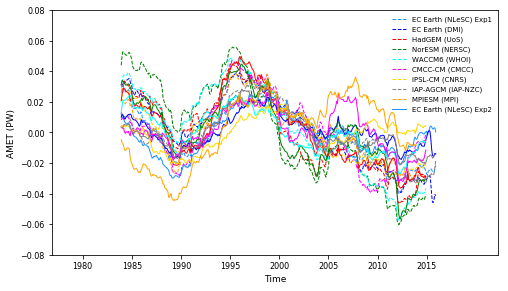

In [28]:
################################   Anomalies at certain sections  ######################################
################################   only ensemble mean is used     ######################################
################################   comparison between exp 1 and 2 ######################################
# EC Earth (DMI) interannual
fig = plt.figure(figsize=(8,4.5))
# Exp1
# EC Earth (DNLeSC)
plt.plot(index_1979_2015[window-1:], ens_avg_NLeSC_exp1._lowpass, color='dodgerblue', linestyle='--', linewidth=1, label='EC Earth (NLeSC) Exp1')
# EC Earth (DMI)
plt.plot(index_1979_2015[window-1:], ens_avg_DMI_exp1._lowpass, color='blue', linestyle='--', linewidth=1, label='EC Earth (DMI)')
# HadGEM (UoS)
plt.plot(index_1979_2014[window-1:], ens_avg_UoS_exp1._lowpass, color='red', linestyle='--', linewidth=1, label='HadGEM (UoS)')
# NorESM (NERSC)
plt.plot(index_1979_2014[window-1:], ens_avg_NERSC_exp1._lowpass, color='green', linestyle='--', linewidth=1, label='NorESM (NERSC)')
# WACCM6 (WHOI)
plt.plot(index_1979_2014[window-1:], ens_avg_WHOI_exp1._lowpass, color='cyan', linestyle='--', linewidth=1, label='WACCM6 (WHOI)')
# CMCC-CM (CMCC)
plt.plot(index_1979_2014[window-1:], ens_avg_CMCC_exp1._lowpass, color='magenta', linestyle='--', linewidth=1, label='CMCC-CM (CMCC)')
# IPSL-CM (CNRS)
plt.plot(index_1979_2014[window-1:], ens_avg_CNRS_exp1._lowpass, color='gold', linestyle='--', linewidth=1, label='IPSL-CM (CNRS)')
# IAP-AGCM (IAP-NZC)
plt.plot(index_1979_2015[window-1:], ens_avg_IAP_exp1._lowpass, color='gray', linestyle='--', linewidth=1, label='IAP-AGCM (IAP-NZC)')
#MPIESM (MPI)
plt.plot(index_1979_2013[window-1:], ens_avg_MPI_exp1._lowpass, color='orange', linestyle='--', linewidth=1, label='MPIESM (MPI)')

# Exp2
# EC Earth (NLeSC)
plt.plot(index_1979_2015[window-1:], ens_avg_NLeSC_exp2._lowpass, color='dodgerblue', linestyle='-', linewidth=1, label='EC Earth (NLeSC) Exp2')
# EC Earth (DMI)
plt.plot(index_1979_2015[window-1:], ens_avg_DMI_exp2._lowpass, color='blue', linestyle='-', linewidth=1)
# HadGEM (UoS)
plt.plot(index_1979_2014[window-1:], ens_avg_UoS_exp2._lowpass, color='red', linestyle='-', linewidth=1)
# NorESM (NERSC)
plt.plot(index_1979_2014[window-1:], ens_avg_NERSC_exp2._lowpass, color='green', linestyle='-', linewidth=1)
# WACCM6 (WHOI)
plt.plot(index_1979_2014[window-1:], ens_avg_WHOI_exp2._lowpass, color='cyan', linestyle='-', linewidth=1)
# CMCC-CM (CMCC)
plt.plot(index_1979_2014[window-1:], ens_avg_CMCC_exp2._lowpass, color='magenta', linestyle='-', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(index_1979_2014[window-1:], ens_avg_CNRS_exp2._lowpass, color='gold', linestyle='-', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(index_1979_2015[window-1:], ens_avg_IAP_exp2._lowpass, color='gray', linestyle='-', linewidth=1)
#MPIESM (MPI)
plt.plot(index_1979_2013[window-1:], ens_avg_MPI_exp2._lowpass, color='orange', linestyle='-', linewidth=1)

plt.xlabel("Time",fontsize=9)
plt.xticks(np.arange(13,yy*12+1,60), index_year,fontsize=8)
plt.xlim(-25,520)
plt.ylabel("AMET (PW)",fontsize=9)
plt.yticks(fontsize=8)
plt.ylim(-0.08,0.08)
plt.legend(frameon=False, loc=1, prop={'size': 7})
plt.show()
fig.savefig(os.path.join(output_path,'Anomaly_lowpass_{}_60N_ensAvg_AMIP_exp12.png'.format(window)),dpi=200)
plt.close(fig)

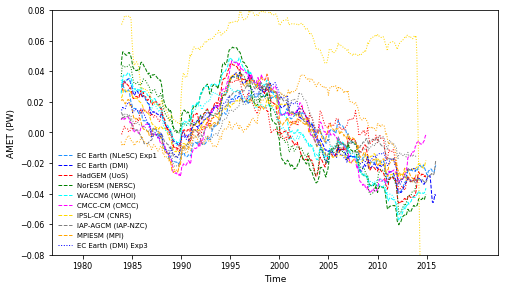

In [30]:
################################   Anomalies at certain sections  ######################################
################################   only ensemble mean is used     ######################################
################################   comparison between exp 1 and 3 ######################################
# EC Earth (DMI) interannual
fig = plt.figure(figsize=(8,4.5))
# Exp1
# EC Earth (DNLeSC)
plt.plot(index_1979_2015[window-1:], ens_avg_NLeSC_exp1._lowpass, color='dodgerblue', linestyle='--', linewidth=1, label='EC Earth (NLeSC) Exp1')
# EC Earth (DMI)
plt.plot(index_1979_2015[window-1:], ens_avg_DMI_exp1._lowpass, color='blue', linestyle='--', linewidth=1, label='EC Earth (DMI)')
# HadGEM (UoS)
plt.plot(index_1979_2014[window-1:], ens_avg_UoS_exp1._lowpass, color='red', linestyle='--', linewidth=1, label='HadGEM (UoS)')
# NorESM (NERSC)
plt.plot(index_1979_2014[window-1:], ens_avg_NERSC_exp1._lowpass, color='green', linestyle='--', linewidth=1, label='NorESM (NERSC)')
# WACCM6 (WHOI)
plt.plot(index_1979_2014[window-1:], ens_avg_WHOI_exp1._lowpass, color='cyan', linestyle='--', linewidth=1, label='WACCM6 (WHOI)')
# CMCC-CM (CMCC)
plt.plot(index_1979_2014[window-1:], ens_avg_CMCC_exp1._lowpass, color='magenta', linestyle='--', linewidth=1, label='CMCC-CM (CMCC)')
# IPSL-CM (CNRS)
plt.plot(index_1979_2014[window-1:], ens_avg_CNRS_exp1._lowpass, color='gold', linestyle='--', linewidth=1, label='IPSL-CM (CNRS)')
# IAP-AGCM (IAP-NZC)
plt.plot(index_1979_2015[window-1:], ens_avg_IAP_exp1._lowpass, color='gray', linestyle='--', linewidth=1, label='IAP-AGCM (IAP-NZC)')
#MPIESM (MPI)
plt.plot(index_1979_2013[window-1:], ens_avg_MPI_exp1._lowpass, color='orange', linestyle='--', linewidth=1, label='MPIESM (MPI)')

# Exp3
# EC Earth (DMI)
plt.plot(index_1979_2013[window-1:], ens_avg_DMI_exp3._lowpass, color='blue', linestyle=':', linewidth=1, label='EC Earth (DMI) Exp3')
# HadGEM (UoS)
plt.plot(index_1979_2013[window-1:], ens_avg_UoS_exp3._lowpass, color='red', linestyle=':', linewidth=1)
# NorESM (NERSC)
plt.plot(index_1979_2013[window-1:], ens_avg_NERSC_exp3._lowpass, color='green', linestyle=':', linewidth=1)
# WACCM6 (WHOI)
plt.plot(index_1979_2012[window-1:], ens_avg_WHOI_exp3._lowpass, color='cyan', linestyle=':', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(index_1979_2014[window-1:], ens_avg_CNRS_exp3._lowpass, color='gold', linestyle=':', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(index_1979_2013[window-1:], ens_avg_IAP_exp3._lowpass, color='gray', linestyle=':', linewidth=1)
#MPIESM (MPI)
plt.plot(index_1979_2013[window-1:], ens_avg_MPI_exp3._lowpass, color='orange', linestyle=':', linewidth=1)

plt.xlabel("Time",fontsize=9)
plt.xticks(np.arange(13,yy*12+1,60), index_year,fontsize=8)
plt.xlim(-25,520)
plt.ylabel("AMET (PW)",fontsize=9)
plt.yticks(fontsize=8)
plt.ylim(-0.08,0.08)
plt.legend(frameon=False, loc=3, prop={'size': 7})
plt.show()
fig.savefig(os.path.join(output_path,'Anomaly_lowpass_{}_60N_ensAvg_AMIP_exp13.png'.format(window)),dpi=200)
plt.close(fig)

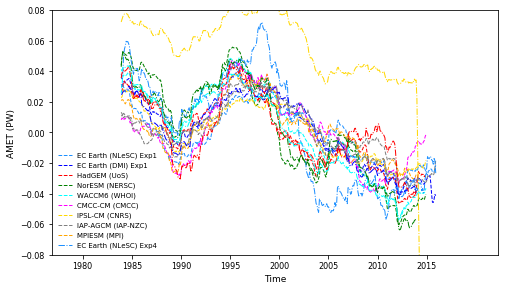

In [31]:
################################   Anomalies at certain sections  ######################################
################################   only ensemble mean is used     ######################################
################################   comparison between exp 1 and 4 ######################################

# EC Earth (DMI) interannual
fig = plt.figure(figsize=(8,4.5))
# Exp1
# EC Earth (NLeSC)
plt.plot(index_1979_2015[window-1:], ens_avg_NLeSC_exp1._lowpass, color='dodgerblue', linestyle='--', linewidth=1, label='EC Earth (NLeSC) Exp1')
# EC Earth (DMI)
plt.plot(index_1979_2015[window-1:], ens_avg_DMI_exp1._lowpass, color='blue', linestyle='--', linewidth=1, label='EC Earth (DMI) Exp1')
# HadGEM (UoS)
plt.plot(index_1979_2014[window-1:], ens_avg_UoS_exp1._lowpass, color='red', linestyle='--', linewidth=1, label='HadGEM (UoS)')
# NorESM (NERSC)
plt.plot(index_1979_2014[window-1:], ens_avg_NERSC_exp1._lowpass, color='green', linestyle='--', linewidth=1, label='NorESM (NERSC)')
# WACCM6 (WHOI)
plt.plot(index_1979_2014[window-1:], ens_avg_WHOI_exp1._lowpass, color='cyan', linestyle='--', linewidth=1, label='WACCM6 (WHOI)')
# CMCC-CM (CMCC)
plt.plot(index_1979_2014[window-1:], ens_avg_CMCC_exp1._lowpass, color='magenta', linestyle='--', linewidth=1, label='CMCC-CM (CMCC)')
# IPSL-CM (CNRS)
plt.plot(index_1979_2014[window-1:], ens_avg_CNRS_exp1._lowpass, color='gold', linestyle='--', linewidth=1, label='IPSL-CM (CNRS)')
# IAP-AGCM (IAP-NZC)
plt.plot(index_1979_2015[window-1:], ens_avg_IAP_exp1._lowpass, color='gray', linestyle='--', linewidth=1, label='IAP-AGCM (IAP-NZC)')
#MPIESM (MPI)
plt.plot(index_1979_2013[window-1:], ens_avg_MPI_exp1._lowpass, color='orange', linestyle='--', linewidth=1, label='MPIESM (MPI)')

# Exp4
# EC Earth (DNLeSC)
plt.plot(index_1979_2015[window-1:], ens_avg_NLeSC_exp4._lowpass, color='dodgerblue', linestyle='-.', linewidth=1, label='EC Earth (NLeSC) Exp4')
# EC Earth (DMI)
plt.plot(index_1979_2013[window-1:], ens_avg_DMI_exp4._lowpass, color='blue', linestyle='-.', linewidth=1)
# HadGEM (UoS)
plt.plot(index_1979_2013[window-1:], ens_avg_UoS_exp4._lowpass, color='red', linestyle='-.', linewidth=1)
# NorESM (NERSC)
plt.plot(index_1979_2013[window-1:], ens_avg_NERSC_exp4._lowpass, color='green', linestyle='-.', linewidth=1)
# WACCM6 (WHOI)
plt.plot(index_1979_2012[window-1:], ens_avg_WHOI_exp4._lowpass, color='cyan', linestyle='-.', linewidth=1)
# IPSL-CM (CNRS)
plt.plot(index_1979_2014[window-1:], ens_avg_CNRS_exp4._lowpass, color='gold', linestyle='-.', linewidth=1)
# IAP-AGCM (IAP-NZC)
plt.plot(index_1979_2013[window-1:], ens_avg_IAP_exp4._lowpass, color='gray', linestyle='-.', linewidth=1)
#MPIESM (MPI)
#plt.plot(index_1979_2013[window-1:], ens_avg_MPI_exp3._lowpass, color='orange', linestyle='-', linewidth=1)


plt.xlabel("Time",fontsize=9)
plt.xticks(np.arange(13,yy*12+1,60), index_year,fontsize=8)
plt.xlim(-25,520)
plt.ylabel("AMET (PW)",fontsize=9)
plt.yticks(fontsize=8)
plt.ylim(-0.08,0.08)
plt.legend(frameon=False, loc=3, prop={'size': 7})
plt.show()
fig.savefig(os.path.join(output_path,'Anomaly_lowpass_{}_60N_ensAvg_AMIP_exp14.png'.format(window)),dpi=200)
plt.close(fig)